# 1033 Data 
### Summary
 - Download raw set
 - Group set by State, Item Name, Ship Date, and NSN (National Stock Number)
 - Derive PSC (Product and Suppy Codes) to categorize items.
 - Download PSC Manual to relate descriptions to PSC codes

In [3]:
import pandas as pd
program_df = pd.read_csv('https://query.data.world/s/jblkhnme7uibgq4golet263yn5jcvj')


In [4]:
program_df.head()

,Year,Month,State_Ab,State,County,NSN,Item Name,Quantity,UI,Acquisition.Cost,Total.Cost,Ship Date
0,2012,8,AK,ALASKA,ANCHORAGE,1005-00-073-9421,"RIFLE,5.56 MILLIMETER",1,Each,499.0,499.0,8/15/2012
1,2012,8,AK,ALASKA,ANCHORAGE,1005-00-073-9421,"RIFLE,5.56 MILLIMETER",1,Each,499.0,499.0,8/15/2012
2,2012,8,AK,ALASKA,ANCHORAGE,1005-00-073-9421,"RIFLE,5.56 MILLIMETER",1,Each,499.0,499.0,8/15/2012
3,2012,8,AK,ALASKA,ANCHORAGE,1005-00-073-9421,"RIFLE,5.56 MILLIMETER",1,Each,499.0,499.0,8/15/2012
4,2012,8,AK,ALASKA,ANCHORAGE,1005-00-073-9421,"RIFLE,5.56 MILLIMETER",1,Each,499.0,499.0,8/15/2012


In [5]:
# Create a new DF grouping by State, Item Name, Ship Date, NSN.
# Get sum of Quantity
summary_df = program_df.groupby(by = ['Year','State','State_Ab','County', 'Item Name', 'Ship Date','NSN'])['Quantity'].sum()
summary_df = pd.DataFrame(summary_df)
summary_df.reset_index(inplace= True)
#summary_df.head()

In [6]:
# Having a mental block...I'm sure there is a more elegant way to add the sum of total cost to the DF above.  But this works.
# Make a new DF and merge it into summary_df on the non-aggregated attributes.
merge_can = program_df.groupby(by= ['Year','State','State_Ab','County', 'Item Name', 'Ship Date','NSN'])['Total.Cost'].sum()
merge_can = pd.DataFrame(merge_can)
merge_can.head()
merge_can.reset_index(inplace = True)
summary_df = summary_df.merge(merge_can, how= "inner", on = ['Year','State','State_Ab','County', 'Item Name', 'Ship Date','NSN'])
# summary_df.head()

In [7]:
# Per "Federal Procurement Data System" manual, 
# the PSC code can be used to categorize the Item Names and are the first 4 char of the NSN
# Get the PSC code from the NSN
summary_df['psc'] = summary_df['NSN'].str.slice(start=0, stop=4, step=None)

In [8]:
summary_df["psc"]=pd.to_numeric(summary_df["psc"], errors='coerce')


In [9]:
summary_df.head()


,Year,State,State_Ab,County,Item Name,Ship Date,NSN,Quantity,Total.Cost,psc
0,2006,ALABAMA,AL,AUTAUGA,"RIFLE,5.56 MILLIMETER",11/15/2006,1005-00-073-9421,4,1996.00,1005
1,2006,ALABAMA,AL,BALDWIN,"PISTOL,CALIBER .45,AUTOMATIC",11/15/2006,1005-00-726-5655,24,1409.04,1005
2,2006,ALABAMA,AL,BALDWIN,"RIFLE,5.56 MILLIMETER",11/15/2006,1005-00-073-9421,2,998.00,1005
3,2006,ALABAMA,AL,BALDWIN,"RIFLE,5.56 MILLIMETER",4/15/2006,1005-00-073-9421,4,1996.00,1005
4,2006,ALABAMA,AL,BALDWIN,"RIFLE,7.62 MILLIMETER",11/15/2006,1005-00-589-1271,10,1380.00,1005


## Enhance Data with PSC Manual Data

### Steps:
 - Load PSC Codes
 - Load Group Codes
 - Merge PSC and Group data
 - Merge that set into Summary data
 

In [10]:
psc_df = pd.read_csv("psc_codes.csv")
#psc_df.head()

In [11]:
group_df = pd.read_csv("group_codes.csv" )
#group_df.head()

In [12]:
# use an inner join.  How many records drop?
# psc to numeric on both psc_df and summary_df.  There is an issue merging otherwise.
psc_df = psc_df.merge(group_df, how= 'inner', on = "group")
psc_df["psc"]=pd.to_numeric(psc_df["psc"], errors='coerce')


In [13]:
summary_df = summary_df.merge(psc_df, how = 'inner', on = 'psc')

In [14]:
summary_df.head()

,Year,State,State_Ab,County,Item Name,Ship Date,NSN,Quantity,Total.Cost,psc,group,psc_desc,psc_category,group_desc,group_note
0,2006,ALABAMA,AL,AUTAUGA,"RIFLE,5.56 MILLIMETER",11/15/2006,1005-00-073-9421,4,1996.00,1005,10,Guns,through 30mm,Weapons,This group includes combat weapons as well as ...
1,2006,ALABAMA,AL,BALDWIN,"PISTOL,CALIBER .45,AUTOMATIC",11/15/2006,1005-00-726-5655,24,1409.04,1005,10,Guns,through 30mm,Weapons,This group includes combat weapons as well as ...
2,2006,ALABAMA,AL,BALDWIN,"RIFLE,5.56 MILLIMETER",11/15/2006,1005-00-073-9421,2,998.00,1005,10,Guns,through 30mm,Weapons,This group includes combat weapons as well as ...
3,2006,ALABAMA,AL,BALDWIN,"RIFLE,5.56 MILLIMETER",4/15/2006,1005-00-073-9421,4,1996.00,1005,10,Guns,through 30mm,Weapons,This group includes combat weapons as well as ...
4,2006,ALABAMA,AL,BALDWIN,"RIFLE,7.62 MILLIMETER",11/15/2006,1005-00-589-1271,10,1380.00,1005,10,Guns,through 30mm,Weapons,This group includes combat weapons as well as ...


In [15]:
geo_df = pd.read_csv("geo.csv")
geo_df.head()

,Lat,Lon,State_Ab,County
0,40.922326,-72.637078,NY,SUFFOLK
1,18.165273,-66.722583,PR,ADJUNTAS
2,18.393103,-67.180953,PR,AGUADA
3,18.455913,-67.145780,PR,AGUADILLA
4,18.172947,-66.944111,PR,MARICAO


In [16]:
summary_df = summary_df.merge(geo_df, how= "left", on = ['State_Ab','County'])

In [17]:
summary_df.head()

,Year,State,State_Ab,County,Item Name,Ship Date,NSN,Quantity,Total.Cost,psc,group,psc_desc,psc_category,group_desc,group_note,Lat,Lon
0,2006,ALABAMA,AL,AUTAUGA,"RIFLE,5.56 MILLIMETER",11/15/2006,1005-00-073-9421,4,1996.00,1005,10,Guns,through 30mm,Weapons,This group includes combat weapons as well as ...,32.450328,-86.721712
1,2006,ALABAMA,AL,BALDWIN,"PISTOL,CALIBER .45,AUTOMATIC",11/15/2006,1005-00-726-5655,24,1409.04,1005,10,Guns,through 30mm,Weapons,This group includes combat weapons as well as ...,30.763492,-87.756371
2,2006,ALABAMA,AL,BALDWIN,"RIFLE,5.56 MILLIMETER",11/15/2006,1005-00-073-9421,2,998.00,1005,10,Guns,through 30mm,Weapons,This group includes combat weapons as well as ...,30.763492,-87.756371
3,2006,ALABAMA,AL,BALDWIN,"RIFLE,5.56 MILLIMETER",4/15/2006,1005-00-073-9421,4,1996.00,1005,10,Guns,through 30mm,Weapons,This group includes combat weapons as well as ...,30.763492,-87.756371
4,2006,ALABAMA,AL,BALDWIN,"RIFLE,7.62 MILLIMETER",11/15/2006,1005-00-589-1271,10,1380.00,1005,10,Guns,through 30mm,Weapons,This group includes combat weapons as well as ...,30.763492,-87.756371


In [18]:
import matplotlib.pyplot as plt 
import seaborn as sns

No handles with labels found to put in legend.


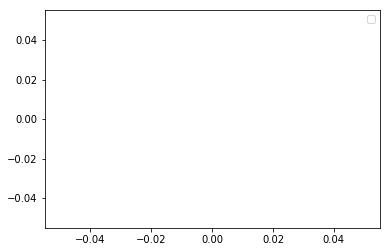

In [19]:
plt.plot(kind="scatter", x=summary_df["Lon"], y=summary_df["Lat"],
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
plt.show()

In [29]:

military_df =summary_df[summary_df['group'].isin(['10', '13', '14'])]

military_df

,Year,State,State_Ab,County,Item Name,Ship Date,NSN,Quantity,Total.Cost,psc,group,psc_desc,psc_category,group_desc,group_note,Lat,Lon
0,2006,ALABAMA,AL,AUTAUGA,"RIFLE,5.56 MILLIMETER",11/15/2006,1005-00-073-9421,4,1996.00,1005,10,Guns,through 30mm,Weapons,This group includes combat weapons as well as ...,32.450328,-86.721712
1,2006,ALABAMA,AL,BALDWIN,"PISTOL,CALIBER .45,AUTOMATIC",11/15/2006,1005-00-726-5655,24,1409.04,1005,10,Guns,through 30mm,Weapons,This group includes combat weapons as well as ...,30.763492,-87.756371
2,2006,ALABAMA,AL,BALDWIN,"RIFLE,5.56 MILLIMETER",11/15/2006,1005-00-073-9421,2,998.00,1005,10,Guns,through 30mm,Weapons,This group includes combat weapons as well as ...,30.763492,-87.756371
3,2006,ALABAMA,AL,BALDWIN,"RIFLE,5.56 MILLIMETER",4/15/2006,1005-00-073-9421,4,1996.00,1005,10,Guns,through 30mm,Weapons,This group includes combat weapons as well as ...,30.763492,-87.756371
4,2006,ALABAMA,AL,BALDWIN,"RIFLE,7.62 MILLIMETER",11/15/2006,1005-00-589-1271,10,1380.00,1005,10,Guns,through 30mm,Weapons,This group includes combat weapons as well as ...,30.763492,-87.756371
5,2006,ALABAMA,AL,BARBOUR,"RIFLE,5.56 MILLIMETER",11/15/2006,1005-00-073-9421,10,4990.00,1005,10,Guns,through 30mm,Weapons,This group includes combat weapons as well as ...,31.805322,-85.421299
6,2006,ALABAMA,AL,BIBB,"RIFLE,5.56 MILLIMETER",11/15/2006,1005-00-073-9421,8,3992.00,1005,10,Guns,through 30mm,Weapons,This group includes combat weapons as well as ...,32.989499,-87.220392
7,2006,ALABAMA,AL,BLOUNT,"RIFLE,5.56 MILLIMETER",11/15/2006,1005-00-073-9421,2,998.00,1005,10,Guns,through 30mm,Weapons,This group includes combat weapons as well as ...,33.922162,-86.449262
8,2006,ALABAMA,AL,BLOUNT,"RIFLE,7.62 MILLIMETER",11/15/2006,1005-00-589-1271,1,138.00,1005,10,Guns,through 30mm,Weapons,This group includes combat weapons as well as ...,33.922162,-86.449262
9,2006,ALABAMA,AL,BLOUNT,"RIFLE,7.62 MILLIMETER",5/15/2006,1005-00-589-1271,2,276.00,1005,10,Guns,through 30mm,Weapons,This group includes combat weapons as well as ...,33.922162,-86.449262


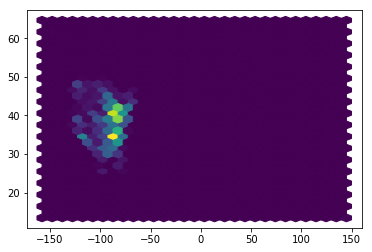

In [43]:
x = military_df['Lon']
y = military_df['Lat']
s = military_df['Total.Cost']

plt.hexbin(x=x, y=y, gridsize=30)
    

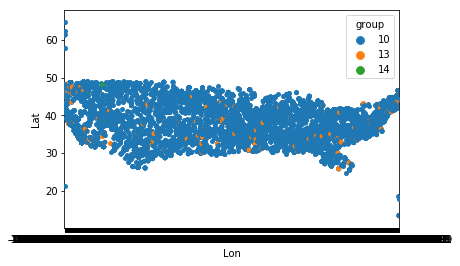

In [47]:
sns.stripplot(x=x, y=y, hue=military_df['group'], data= military_df)